# Dataset Description:

The dataset shows the weekly 2018 retail scan data for National retail volume (units) and price of Avacados, downloaded from the Hass Avocado Board website. The Average Price (of avocados) in the data reflects a per unit (per avocado) cost. Our task is to predict the Average Price of Avacado. 

# Importing the Dataset:

In [74]:
import pandas as pd
import numpy as np

In [75]:
df=pd.read_csv("Avacado_project.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [76]:
df.shape

(16468, 14)

# Checking null values in Dataset:

In [77]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

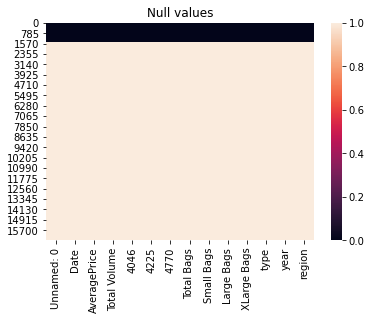

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

With the help of heatmap we can see that there are Null values present in the dataset.

Through observation we go to know that there are lot of blank rows present in the dataset, which are shown as null values.

We would replace those blank rows with nan and then drop those.

In [79]:
df.replace(" ",np.nan)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.dropna(subset= ["Date", "AveragePrice", "4046", "4225", "4770"], inplace=True)

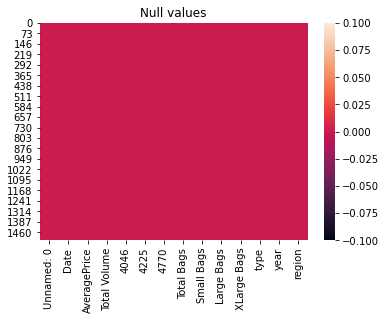

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [82]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Now there are no null values in the dataset.

In [83]:
df.shape

(1517, 14)

The size of the dataset has also reduced, as the there were many blank rows in it which has been dropped.

# Checking the datatypes of the columns:

In [84]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [85]:
Date = pd.Series(
    pd.date_range("27-12-2015", periods=2, freq="Y")
)

In [86]:
Date

0   2015-12-31
1   2016-12-31
dtype: datetime64[ns]

In [87]:
Date.dt.year

0    2015
1    2016
dtype: int64

# Encoding the Dataset:

Since there are string values present in the dataset, we will use encoding techniques to covert it:

In [93]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [94]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [95]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,92,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0.0,2015.0,0.0
1,1.0,68,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0.0,2015.0,0.0
2,2.0,44,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0.0,2015.0,0.0
3,3.0,20,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0.0,2015.0,0.0
4,4.0,98,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0.0,2015.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,53,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0.0,2016.0,7.0
1513,11.0,29,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0.0,2016.0,7.0
1514,12.0,5,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0.0,2016.0,7.0
1515,13.0,83,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0.0,2016.0,7.0


# Describing the dataset:

In [96]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,26.995386,50.624918,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,14.848287,30.040469,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.000000,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,14.000000,25.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,29.000000,49.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,39.000000,75.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,51.000000,103.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


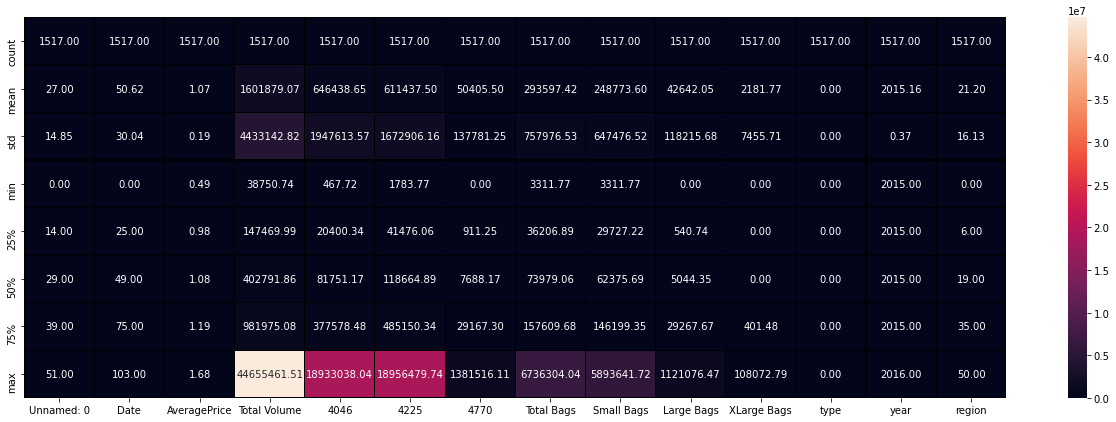

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation of the columns with the Target column:

In [98]:
df.corr()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.145600,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,NaN,-0.012854,0.012123
Date,-0.145600,1.000000,0.092984,-0.024767,-0.020773,-0.035118,-0.016382,-0.010990,-0.005656,-0.040195,0.011274,NaN,0.022750,-0.026002
AveragePrice,-0.075531,0.092984,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408
Total Volume,0.091934,-0.024767,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579
4046,0.092013,-0.020773,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481
4225,0.093566,-0.035118,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733
4770,0.075647,-0.016382,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092
Total Bags,0.081007,-0.010990,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001
Small Bags,0.083485,-0.005656,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650
Large Bags,0.065364,-0.040195,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452


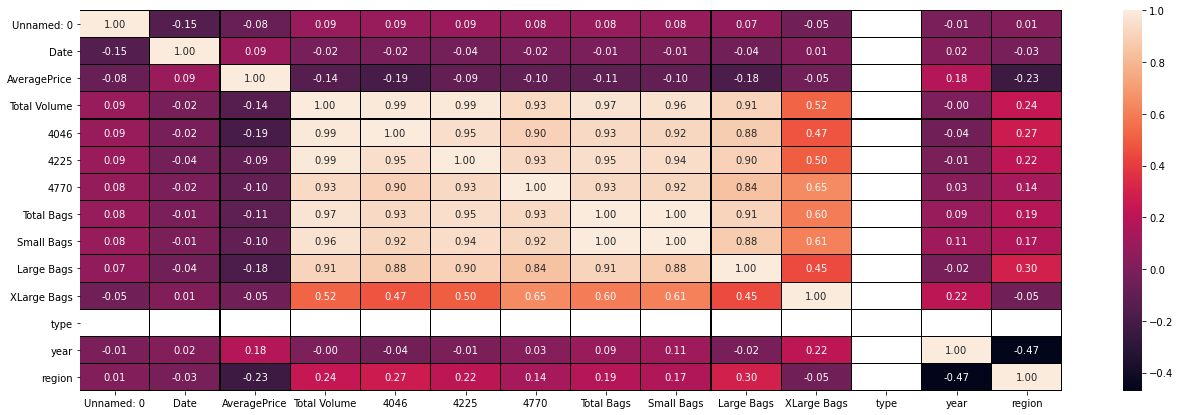

In [99]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Checking the columns which are positively and negatively correlated with the target column.

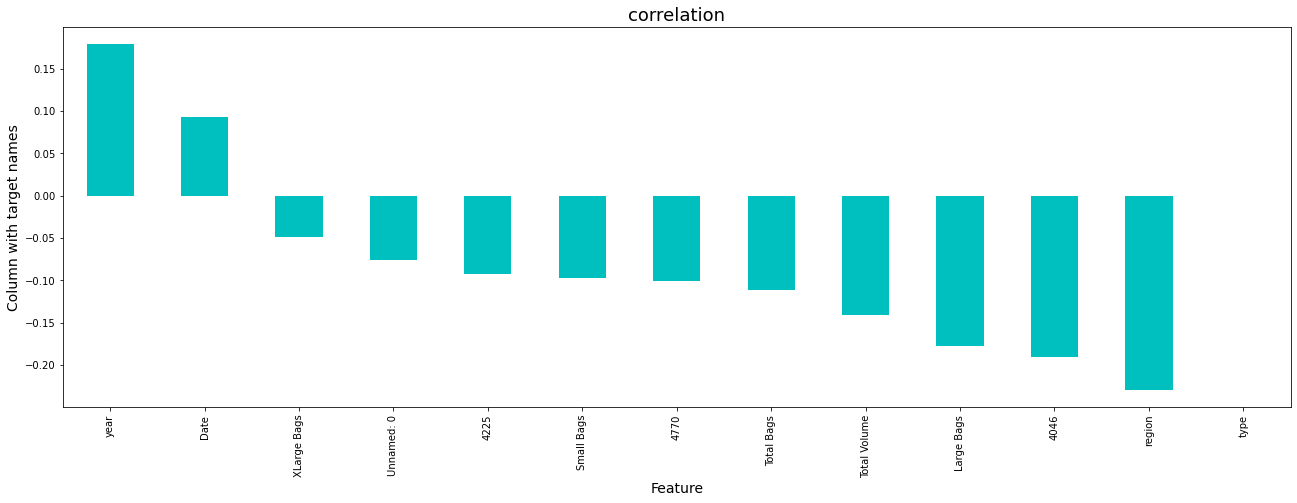

In [145]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Checking the skewness and Outliers: 

In [146]:
df.skew()

Unnamed: 0     -0.234824
Date            0.012623
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

We can see that the data has skewness. So we will be removing skewness.

In [147]:
from sklearn.preprocessing import power_transform
df_new = power_transform(df)

df_new = pd.DataFrame(df_new,columns=df.columns)

In [148]:
df_new.skew()

Unnamed: 0     -0.348219
Date           -0.286196
AveragePrice    0.021101
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
type            0.000000
year            0.000000
region         -0.209568
dtype: float64

In [149]:
x=df_new

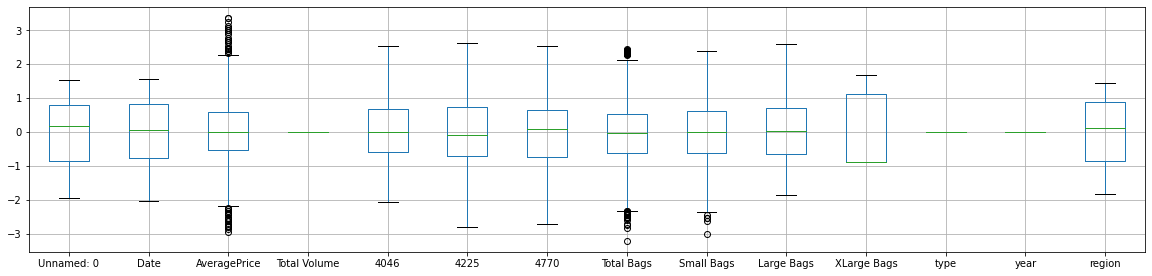

In [150]:
x.iloc[:,0:14].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

We won't be removing outliers since we are losing all the data if the outliers are removed.

# Separating the columns into x(independent variables) and y(Target variable):

In [151]:
x= df.drop("AveragePrice",axis=1)
y= df["AveragePrice"]

# Scaling the data using Min-Max scaler:

In [152]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [153]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the training accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.19644869630852801
At random state 0,the training accuracy is:- 0.13471737856574106


At random state 1,the training accuracy is:- 0.17692858586522087
At random state 1,the training accuracy is:- 0.20420029403324946


At random state 2,the training accuracy is:- 0.1896040064915563
At random state 2,the training accuracy is:- 0.15936850454670537


At random state 3,the training accuracy is:- 0.20622803022135083
At random state 3,the training accuracy is:- 0.07873186735673876


At random state 4,the training accuracy is:- 0.21025988295102183
At random state 4,the training accuracy is:- 0.047958451310278316


At random state 5,the training accuracy is:- 0.1856500044714866
At random state 5,the training accuracy is:- 0.17966210008746308


At random state 6,the training accuracy is:- 0.1924841625385887
At random state 6,the training accuracy is:- 0.1364801462988603


At random state 7,the training accuracy is:- 0.19616346785331729
At random stat

At random state 64,the training accuracy is:- 0.19688733243415013
At random state 64,the training accuracy is:- 0.1011311829535787


At random state 65,the training accuracy is:- 0.18853302303631503
At random state 65,the training accuracy is:- 0.15963432237575703


At random state 66,the training accuracy is:- 0.19461280834061856
At random state 66,the training accuracy is:- 0.14219913779209736


At random state 67,the training accuracy is:- 0.18485479681883676
At random state 67,the training accuracy is:- 0.17870816745376616


At random state 68,the training accuracy is:- 0.18869208344180521
At random state 68,the training accuracy is:- 0.1398851836120869


At random state 69,the training accuracy is:- 0.20353481235184734
At random state 69,the training accuracy is:- 0.09031085463188782


At random state 70,the training accuracy is:- 0.17951705210319968
At random state 70,the training accuracy is:- 0.19988807327224234


At random state 71,the training accuracy is:- 0.1950608082923156

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=58)

In [155]:
lr.fit(x_train,y_train)

LinearRegression()

In [156]:
pred_test=lr.predict(x_test)

In [157]:
print(r2_score(y_test,pred_test))

0.10617886336134474


# Cross validation of the model:

In [158]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is -3.224116814137914 and accuracy score for training is -0.11695923191566737 and accuracy for the testing is 0.10617886336134474


At cross fold 3 the cv score is -0.8620871452218467 and accuracy score for training is -0.11695923191566737 and accuracy for the testing is 0.10617886336134474


At cross fold 4 the cv score is -0.16516995649684063 and accuracy score for training is -0.11695923191566737 and accuracy for the testing is 0.10617886336134474


At cross fold 5 the cv score is -0.41878113310725784 and accuracy score for training is -0.11695923191566737 and accuracy for the testing is 0.10617886336134474


At cross fold 6 the cv score is -1.5344405672513257 and accuracy score for training is -0.11695923191566737 and accuracy for the testing is 0.10617886336134474


At cross fold 7 the cv score is -0.4174750133647037 and accuracy score for training is -0.11695923191566737 and accuracy for the testing is 0.10617886336134474


At cross fold 8 the cv scor

We will be selecting cv=5.

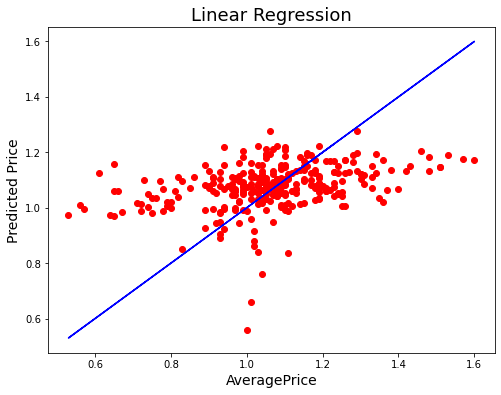

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('AveragePrice', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

# Regularization:

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [161]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [162]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.10629052443707132

In [163]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.4208571306999921

# Ensemble Technique:

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':["auto", "sqrt", "log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [165]:
rf= RandomForestRegressor(criterion="mse",max_features="sqrt")
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 83.30537316186395
Cross Val Score: 24.4248212181271


In [166]:
import pickle 
filename = 'AvacadoProject.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion:

In [167]:
loaded_model = pickle.load(open('AvacadoProject.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8330537316186395


In [168]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])

In [169]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
Predicted,1.187,1.0527,1.1842,1.1775,1.327,1.1829,0.7647,1.2081,0.9268,1.0912,...,1.1137,1.0906,1.078,1.3579,0.9987,1.009,1.1605,1.0281,1.1321,1.1843
Original,1.187,1.0527,1.1842,1.1775,1.327,1.1829,0.7647,1.2081,0.9268,1.0912,...,1.1137,1.0906,1.078,1.3579,0.9987,1.009,1.1605,1.0281,1.1321,1.1843
